In [109]:
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import itertools
%matplotlib inline
def data_gen():
    status = {True:'running', False:'sleeping'}
    return [{'battery':random.randint(0,5), 'status':status[random.random()>0.9]} for i in range(5)]


[]
[(6.200865151048362, 3.468126763901825)]
[]
[(1.3529362943165602, 5.66281355703382)]
[(8.49957579502999, 7.262810103444148)]
[]
[]
[]
[]
[(3.920383457265888, 9.42280678096863)]
[(3.920383457265888, 9.42280678096863)]
[]
[(1.3529362943165602, 5.66281355703382), (8.49957579502999, 7.262810103444148)]
[]


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[]
[(6.200865151048362, 3.468126763901825)]
[(3.920383457265888, 9.42280678096863)]
[(6.200865151048362, 3.468126763901825)]
[]
[]


/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[(1.3529362943165602, 5.66281355703382), (6.200865151048362, 3.468126763901825)]
[(8.49957579502999, 7.262810103444148), (6.200865151048362, 3.468126763901825)]
[(0, 0)]
[]
[]
[]
[]
[]
[]
[]
[]
[(1.3529362943165602, 5.66281355703382), (8.49957579502999, 7.262810103444148)]
[]
[]
[(6.200865151048362, 3.468126763901825), (3.920383457265888, 9.42280678096863)]


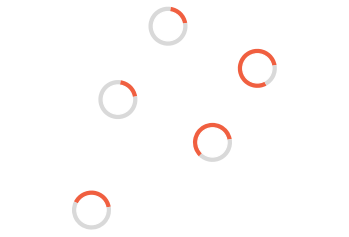

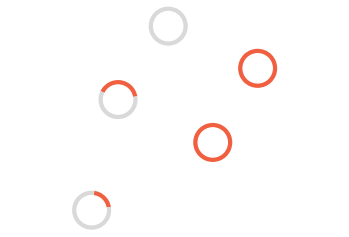

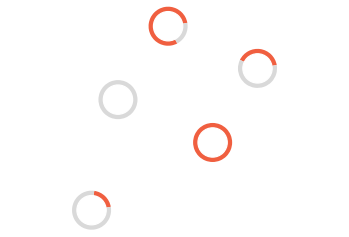

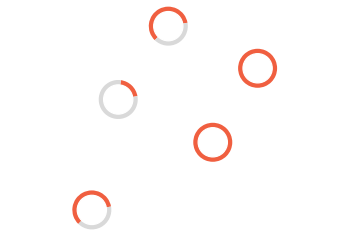

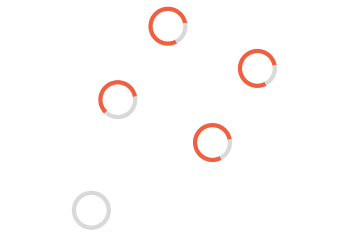

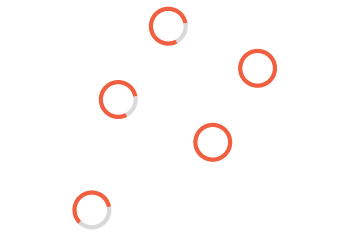

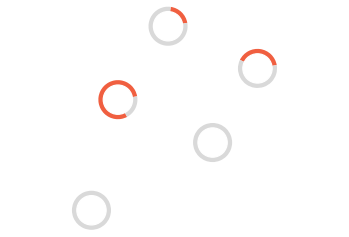

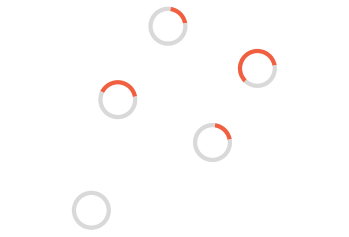

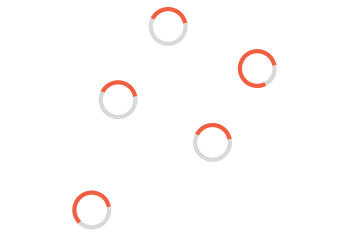

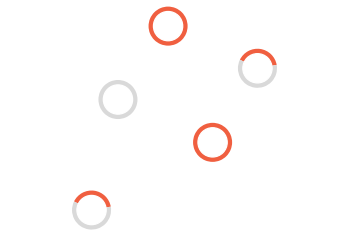

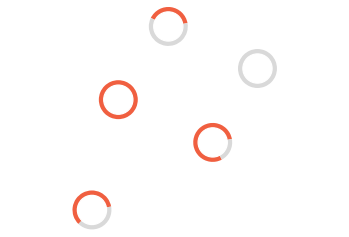

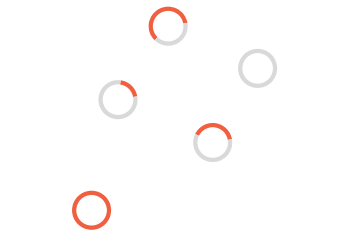

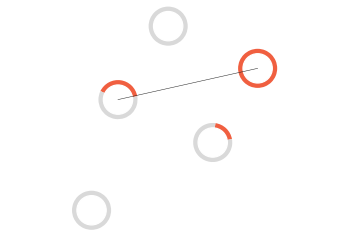

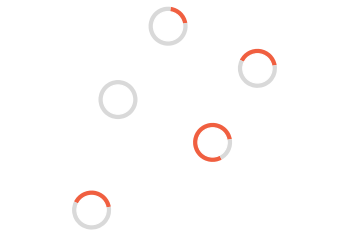

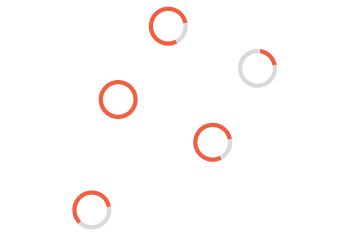

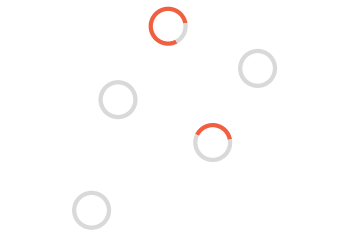

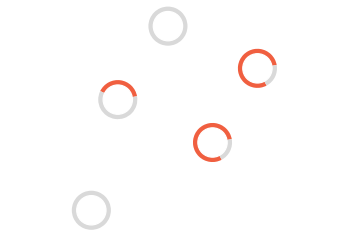

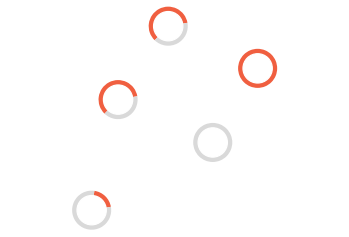

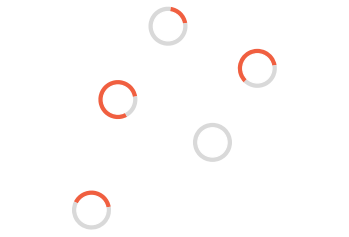

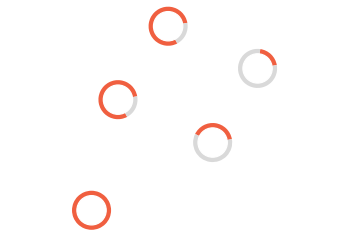

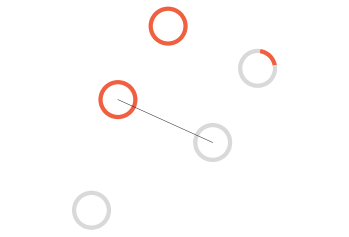

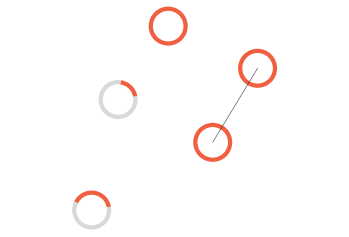

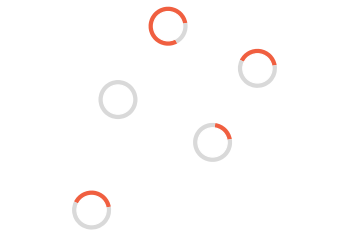

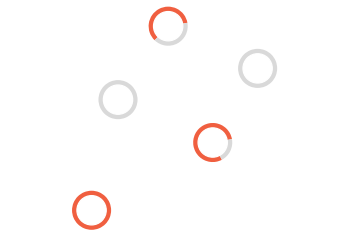

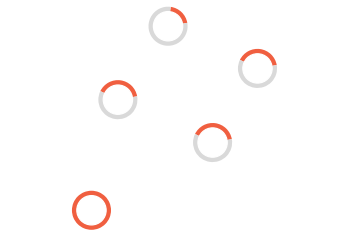

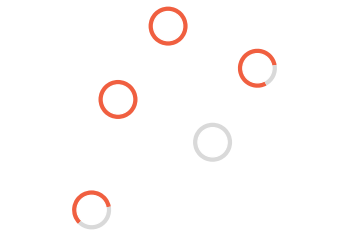

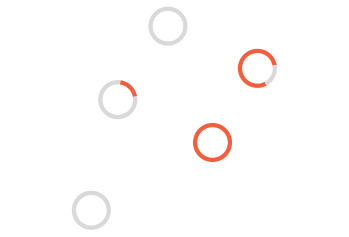

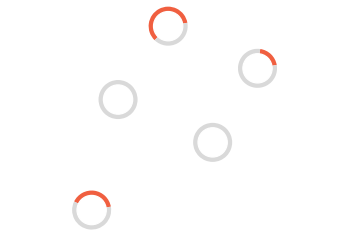

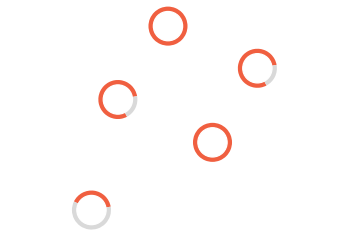

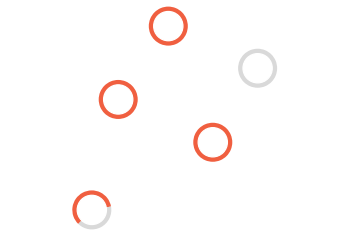

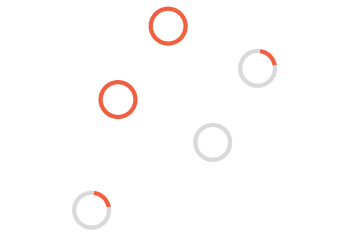

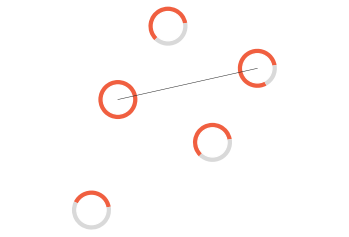

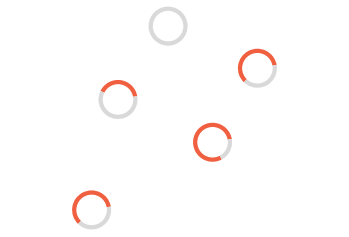

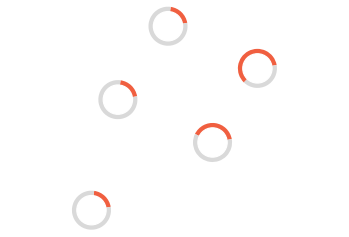

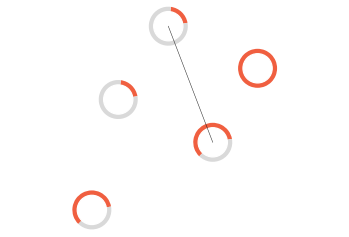

In [111]:
data_stream = (data_gen() for i in range(35))
# The slices will be ordered and plotted counter-clockwise.
def add_pie(fig, ax, center, percent):
    sizes = [percent, 100-percent]
    colors = ['#F05F40', '#d9d9d9']
    ax.pie(sizes, colors=colors,wedgeprops = {'linewidth':0}, center = center, radius = 1, startangle = 10)
        #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle(center,0.75,color='white', fc='white',linewidth=1.25)
    #fig = plt.gcf()
    ax.add_artist(centre_circle)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    ax.axis('equal')
    return fig, ax
def add_line(ax, list_of_pairs):
    #e.g. [(0,0),(1,0)]
    for i in list_of_pairs:
        xs = [j[0] for j in i]
        ys = [j[1] for j in i]
        ppl.plot(ax, xs,ys, color = '#252525', linewidth = 0.5)
centres = gen_centres(1, 10,10, 5)
def update(fig, ax, centres, new_data, max_batt):
    ###centres is a list of centre coordinates
    ###new data is a list of corresponding update, {'battery': , 'status':}
    for ind,centr in enumerate(centres):
        battery = max(100*new_data[ind]['battery']/max_batt, 5)
        fig, ax = add_pie(fig, ax, centr,battery)
    on_pairs = [e for i, e in enumerate(centres) if new_data[i]['status']=='running']
    print(on_pairs)
    pairs = itertools.combinations(on_pairs,2)
    add_line(ax, pairs)
for index, new_data in enumerate(data_stream):
    fig, ax = plt.subplots(1)
    update(fig, ax, centres, new_data, 5)
    fig.savefig('plot/net%d'%index)
#plt.show()  

In [108]:
import random
import math
def distance(xy1, xy2):
    x = (xy2[0]-xy1[0])**2
    y = (xy2[1]-xy1[1])**2
    return math.sqrt(x+y)
def safe(candidate, existing_one, radius):
    return distance(candidate, existing_one)>=radius+2
def safe_vs_all(candidate, all_existing, radius):
    return all([safe(candidate, i, radius) for i in all_existing])
def gen_centre(x, y):
    #generate random within [0,x], [0,y]
    candidate = (x*random.random(), y*random.random())
    return candidate
def gen_safe_centre(radius, x, y, existing):
    #generate random within [0,x], [0,y]
    while True:
        candidate = gen_centre(x,y)
        if safe_vs_all(candidate, existing, radius):
            return candidate
def gen_centres(radius, x, y, number):
    existing = [(0,0)]
    while len(existing)<number:
        existing.append(gen_safe_centre(radius, x,y, existing))
    return existing

In [96]:
[i for i in data_stream]

[[{'battery': 2, 'status': 'running'},
  {'battery': 2, 'status': 'running'},
  {'battery': 4, 'status': 'running'},
  {'battery': 0, 'status': 'sleeping'},
  {'battery': 4, 'status': 'running'}],
 [{'battery': 4, 'status': 'running'},
  {'battery': 0, 'status': 'running'},
  {'battery': 3, 'status': 'running'},
  {'battery': 2, 'status': 'running'},
  {'battery': 3, 'status': 'sleeping'}],
 [{'battery': 0, 'status': 'sleeping'},
  {'battery': 4, 'status': 'sleeping'},
  {'battery': 4, 'status': 'running'},
  {'battery': 3, 'status': 'running'},
  {'battery': 4, 'status': 'sleeping'}],
 [{'battery': 4, 'status': 'running'},
  {'battery': 5, 'status': 'sleeping'},
  {'battery': 1, 'status': 'running'},
  {'battery': 2, 'status': 'sleeping'},
  {'battery': 4, 'status': 'running'}],
 [{'battery': 5, 'status': 'running'},
  {'battery': 3, 'status': 'running'},
  {'battery': 4, 'status': 'running'},
  {'battery': 5, 'status': 'running'},
  {'battery': 0, 'status': 'sleeping'}],
 [{'battery'

In [49]:
centres = gen_centres(1, 10,10, 5)
pairs = itertools.combinations(centres,2)

[(0, 0)]
[(0, 0), (0.9650876237368933, 0.9355045607943491)]
[(0, 0), (0.9650876237368933, 0.9355045607943491), (8.400196277872578, 6.049426247672964)]
[(0, 0), (0.9650876237368933, 0.9355045607943491), (8.400196277872578, 6.049426247672964), (1.976512094105194, 8.02781384205798)]


In [89]:
random.randint(0,5)

3

In [112]:
import functools
def gen():
    def a(b):
        print(b)
    i=0
    while True:
        i+=1
        f = functools.partial(a,i)
        yield f

In [115]:
g = gen()


1


In [122]:
next(g)()

8


In [131]:
import collections
l = collections.deque([], maxlen=5)

In [132]:
for i in range(10):
    l.append(i)
    print(l)

deque([0], maxlen=5)
deque([0, 1], maxlen=5)
deque([0, 1, 2], maxlen=5)
deque([0, 1, 2, 3], maxlen=5)
deque([0, 1, 2, 3, 4], maxlen=5)
deque([1, 2, 3, 4, 5], maxlen=5)
deque([2, 3, 4, 5, 6], maxlen=5)
deque([3, 4, 5, 6, 7], maxlen=5)
deque([4, 5, 6, 7, 8], maxlen=5)
deque([5, 6, 7, 8, 9], maxlen=5)


In [134]:
[i for i in l]

[5, 6, 7, 8, 9]